# Importing libraries, df_all_cleaned & checking outcome

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
%matplotlib inline

In [3]:
# setting wide view of all variables

pd.set_option('display.max_columns', 50)

In [4]:
path=r'/Users/stefaniadaskalaki/Google Drive/Data Immersion/6 Achievement/CF6 BRecom'

In [5]:
# Importing the all_cleaned dataset

df_all=pd.read_csv(os.path.join(path, '02. Data', '02. Prepared Data', 'all_cleaned.csv'),index_col=False)

In [6]:
df_all.head(15)

,Unnamed: 0,order_id,customer_id,order_status,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,3,37.77,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
4,4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:43:15,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,1,37.77,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
5,5,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-25 02:14:11,2017-11-07 18:04:59,2017-11-13 00:00:00,1,boleto,1,44.09,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
6,6,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-25 00:21:09,2017-12-28 18:59:23,2017-12-21 00:00:00,1,credit_card,10,356.12,3e4fd73f1e86b135b9b121d6abbe9597,19400,presidente venceslau,SP,1,be021417a6acb56b9b50d3fd2714baa8,f5f46307a4d15880ca14fab4ad9dfc9b,2017-11-30 00:21:09,339.00,17.12,48.0,664.0,6.0,14300.0,38.0,34.0,34.0,housewares
7,7,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-21 05:15:56,2017-05-10 09:17:55,2017-05-12 00:00:00,1,boleto,1,267.80,f9effeed3df9ae063a58c0759b96f8b2,85804,cascavel,PR,1,a5a0e71a81ae65aa335e71c06261e260,c8417879a15366a17c30af34c798c332,2017-04-27 05:15:56,38.00,15.56,57.0,698.0,3.0,705.0,34.0,22.0,28.0,housewares
8,8,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-21 05:15:56,2017-05-10 09:17:55,2017-05-12 00:00:00,1,boleto,1,267.80,f9effeed3df9ae063a58c0759b96f8b2,85804,cascavel,PR,2,a5a0e71a81ae65aa335e71c06261e260,c8417879a15366a17c30af34c798c332,2017-04-27 05:15:56,38.00,15.56,57.0,698.0,3.0,705.0,34.0,22.0,28.0,housewares
9,9,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-21 05:15:56,2017-05-10 09:17:55,2017-05-12 00:00:00,1,boleto,1,267.80,f9effeed3df9ae063a58c0759b96f8b2,85804,cascavel,PR,3,a5a0e71a81ae65aa335e71c06261e260,c8417879a15366a17c30af

In [7]:
df_all.shape

(113368, 29)

In [8]:
# choosing the two variables to run the time series analysis order_delivered_customer_date & order_id

df_time = df_all[['order_approved_at','order_id']]

# Data cleaning, wraggling and subsetting

In [9]:
# dropping unnamed column

df_all=df_all.drop(columns = ['Unnamed: 0'])

In [10]:
# checking for duplicates

dups = df_all.duplicated()
dups.sum()

# No dups!

0

In [11]:
df_time

,order_approved_at,order_id
0,2017-10-02 11:07:15,e481f51cbdc54678b7cc49136f2d6af7
1,2017-10-02 11:07:15,e481f51cbdc54678b7cc49136f2d6af7
2,2017-10-02 11:07:15,e481f51cbdc54678b7cc49136f2d6af7
3,2017-08-15 20:05:16,128e10d95713541c87cd1a2e48201934
4,2017-08-02 18:43:15,0e7e841ddf8f8f2de2bad69267ecfbcf
...,...,...
113363,2018-08-04 04:25:14,0b82d0616f1ad8da15cf967b984b4004
113364,2018-07-24 10:31:25,2ef4a11b6e24fdfbb43b92cb5f95edff
113365,2018-07-24 10:31:25,2ef4a11b6e24fdfbb43b92cb5f95edff
113366,2017-01-26 11:22:17,2c4ada2e75c2ad41dd93cebb5df5f023


In [12]:
df_time.isnull().sum()

order_approved_at    0
order_id             0
dtype: int64

In [13]:
df_time['order_approved_at'].min()

'2016-10-04 09:43:32'

In [14]:
df_time['order_approved_at'].max()

'2018-08-29 15:10:26'

In [15]:
# converting order_approved_at to date/time data type

df_time['order_approved_at']= pd.to_datetime(df_time['order_approved_at'])

In [16]:
df_time['order_approved_at'] = df_time['order_approved_at'].astype('datetime64[ns]')

In [17]:
# grouping order_approved_at in day and aggregating the order_id per day

df_time.groupby(pd.Grouper(key='order_approved_at', axis=0, freq='D')).agg({'order_id':pd.Series.nunique})

,order_id
order_approved_at,
2016-10-04,18
2016-10-05,7
2016-10-06,92
2016-10-07,47
2016-10-08,23
...,...
2018-08-25,81
2018-08-26,69
2018-08-27,62


In [18]:
# saving new grouped by subset

df_time_group=df_time.groupby(pd.Grouper(key='order_approved_at', axis=0, freq='D')).agg({'order_id':pd.Series.nunique})

In [19]:
# renaming order_id to total_orders

df_time_group.rename(columns = {'order_id' : 'total_orders'}, inplace = True)

In [20]:
df_time_group.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 695 entries, 2016-10-04 to 2018-08-29
Freq: D
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   total_orders  695 non-null    int64
dtypes: int64(1)
memory usage: 10.9 KB


In [21]:
df_time_group.index

DatetimeIndex(['2016-10-04', '2016-10-05', '2016-10-06', '2016-10-07',
               '2016-10-08', '2016-10-09', '2016-10-10', '2016-10-11',
               '2016-10-12', '2016-10-13',
               ...
               '2018-08-20', '2018-08-21', '2018-08-22', '2018-08-23',
               '2018-08-24', '2018-08-25', '2018-08-26', '2018-08-27',
               '2018-08-28', '2018-08-29'],
              dtype='datetime64[ns]', name='order_approved_at', length=695, freq='D')

# Plotting the new df_time_group

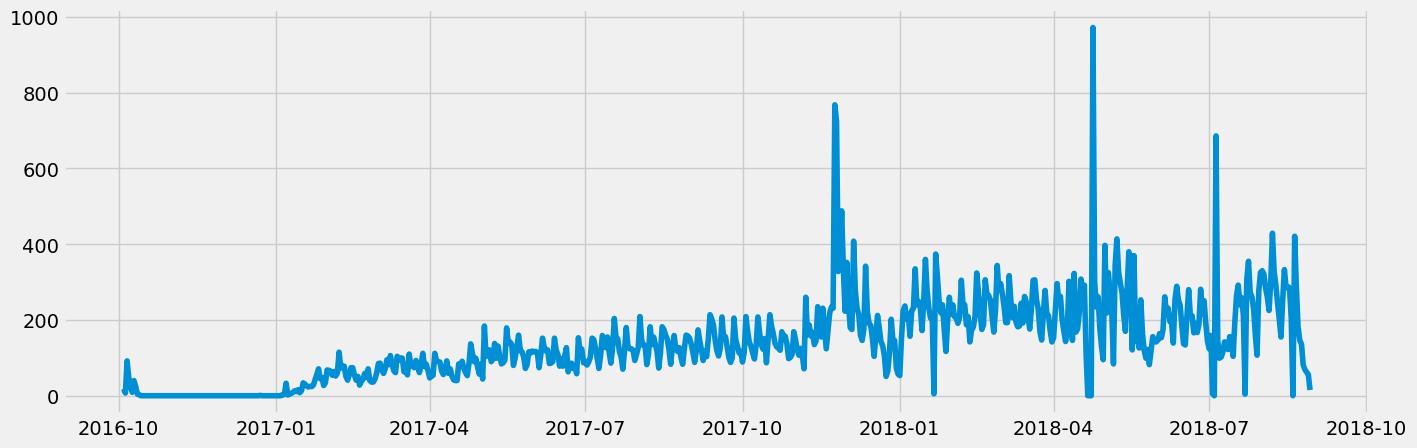

In [22]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_time_group)

# Time-series analysis: decomposition

In [23]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_time_group, model='additive')

In [24]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

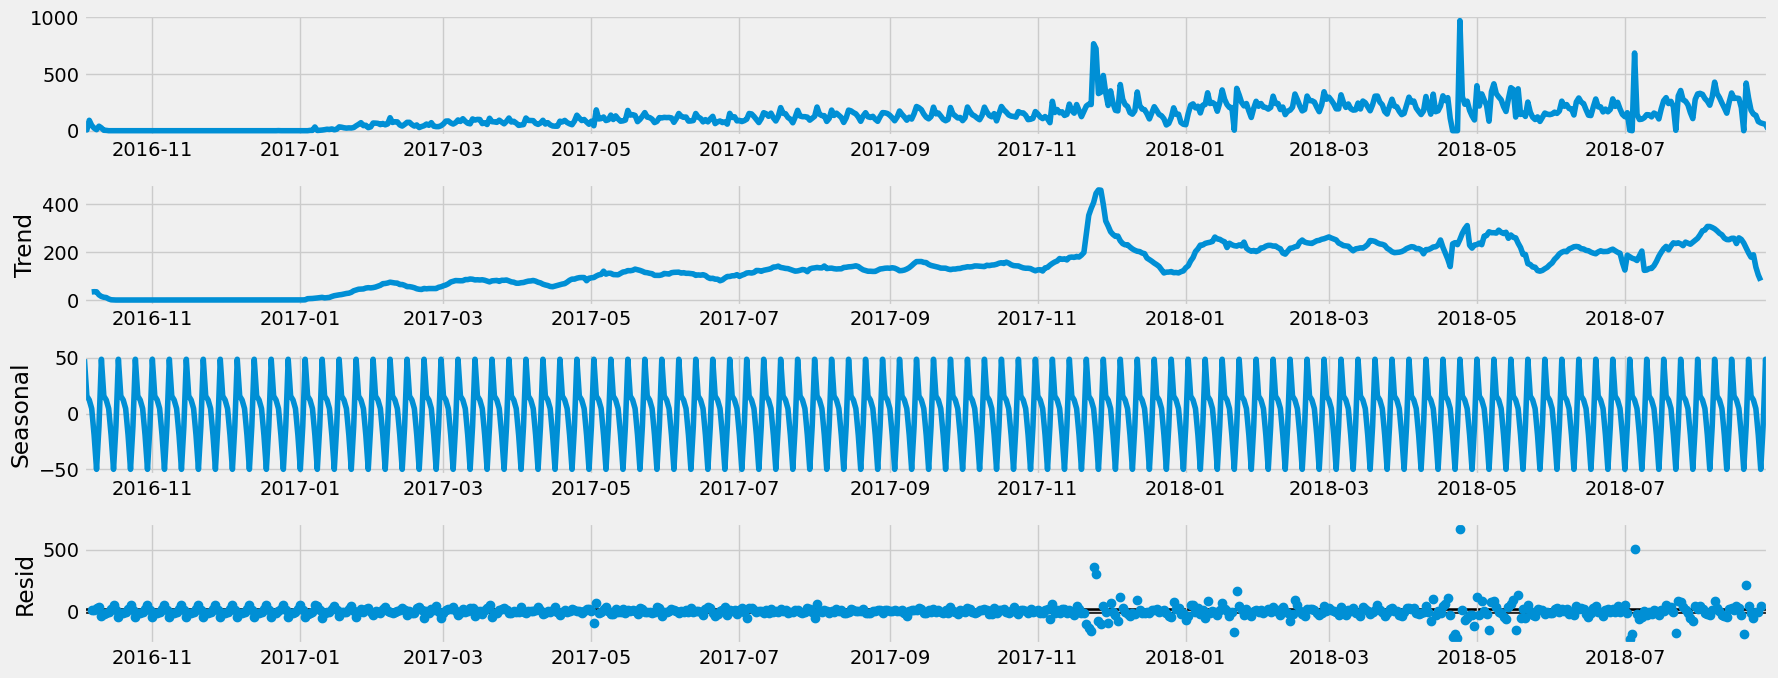

In [25]:
# Plot the separate components

decomposition.plot()
plt.show()

Since the data is not smoothened we can see the difference of the original data on the first line and the 2nd trend line. There is definitely a smooth upwards trend with a very peak in December 2017 which actually could align with the general retail idea that sales peak before Xmas and then drop in January. If we had more data expanding in more years we could actually visualise this seasonality. As we can see from the 3rd line Seasonal there is no seasonality in our data

# Testing for stationarity

In [26]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why we need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_time_group['total_orders'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.318961
p-value                          0.165925
Number of Lags Used             20.000000
Number of Observations Used    674.000000
Critical Value (1%)             -3.440089
Critical Value (5%)             -2.865838
Critical Value (10%)            -2.569059
dtype: float64


p-value is way above 0.05 of what is considered a significant result. However the Test Statistic is smaller than both Critical Values 5% & 10% which means that we can reject our null hypothesis that there is no unit root in our data and the data is stationary

## Checking out a plot of autocorrelations

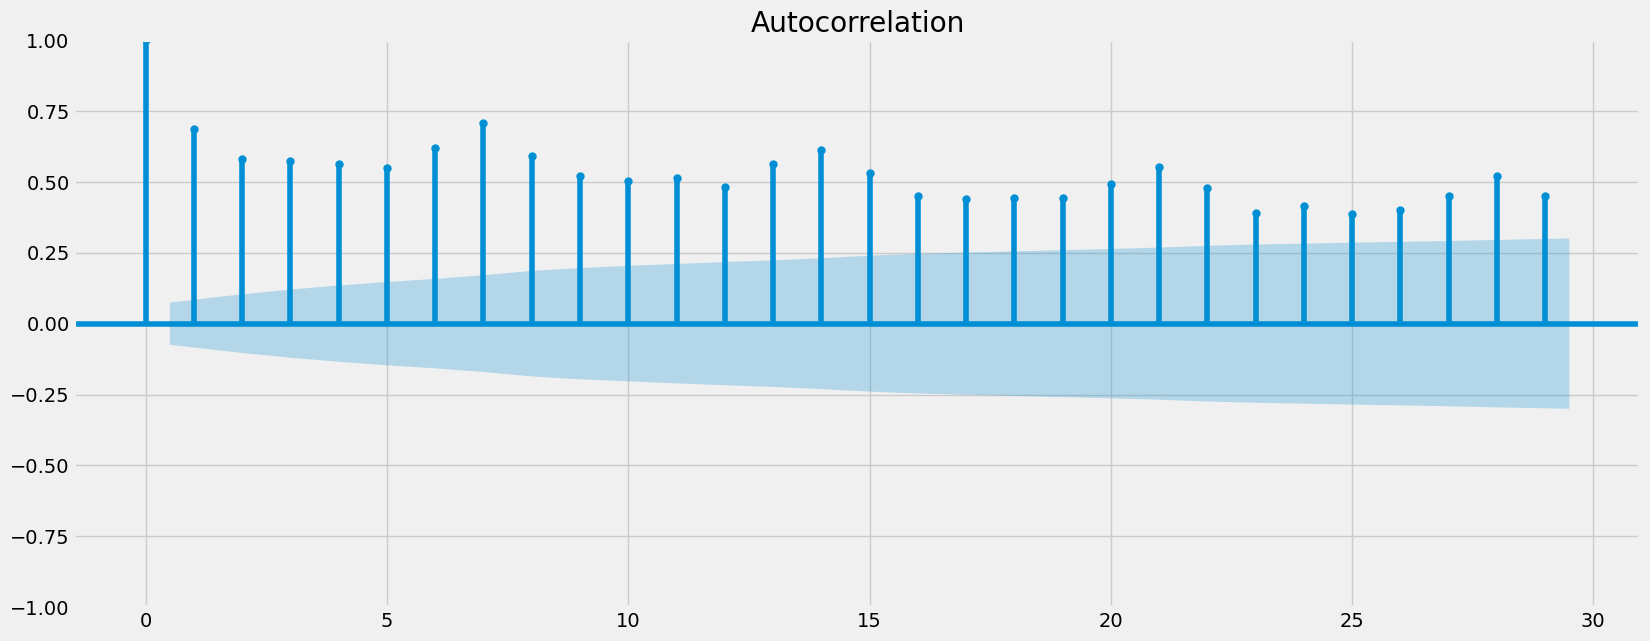

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_time_group)
plt.show()

As we can see from the plot all of the lags are going out of the confidence interval which means that they are significantly correlated with each other. In this case we will need to stationarise our data

# Stationarizing the data with Differencing

In [28]:
df_data_diff = df_time_group - df_time_group.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [29]:
# removing the missing values that came about as a result of the differencing

df_data_diff.dropna(inplace = True)

In [30]:
df_data_diff.head()

,total_orders
order_approved_at,
2016-10-05,-11.0
2016-10-06,85.0
2016-10-07,-45.0
2016-10-08,-24.0
2016-10-09,-14.0


In [31]:
df_data_diff.columns

Index(['total_orders'], dtype='object')

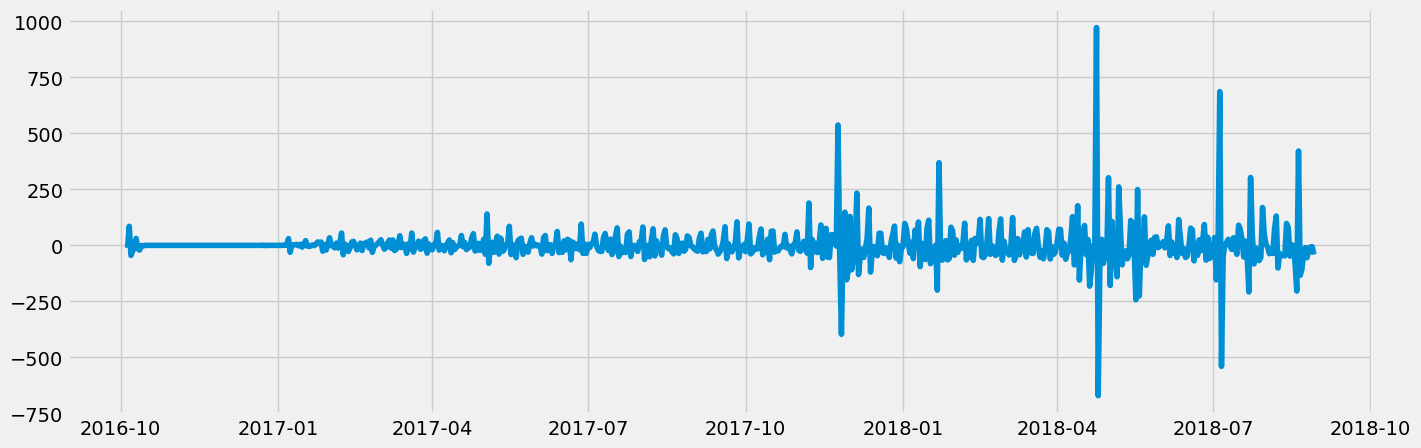

In [32]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_data_diff)

In [33]:
dickey_fuller(df_data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -7.414474e+00
p-value                        6.993992e-11
Number of Lags Used            1.900000e+01
Number of Observations Used    6.740000e+02
Critical Value (1%)           -3.440089e+00
Critical Value (5%)           -2.865838e+00
Critical Value (10%)          -2.569059e+00
dtype: float64


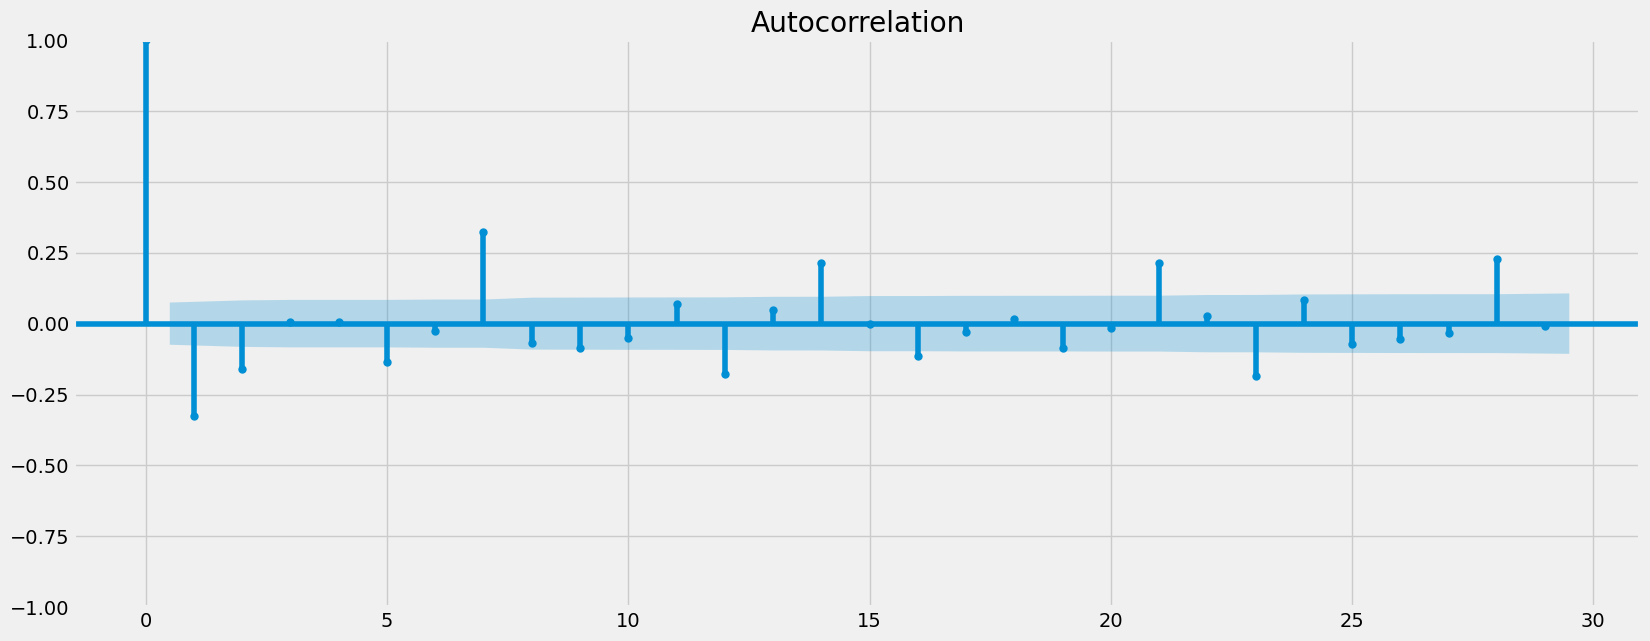

In [34]:
plot_acf(df_data_diff)
plt.show()

# 2nd Rounf of Stationarization with Differencing

In [35]:
df_data_diff2 = df_data_diff - df_data_diff.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [36]:
# removing the missing values that came about as a result of the differencing

df_data_diff2.dropna(inplace = True)

In [37]:
df_data_diff2.head()

,total_orders
order_approved_at,
2016-10-06,96.0
2016-10-07,-130.0
2016-10-08,21.0
2016-10-09,10.0
2016-10-10,45.0


In [38]:
df_data_diff2.columns

Index(['total_orders'], dtype='object')

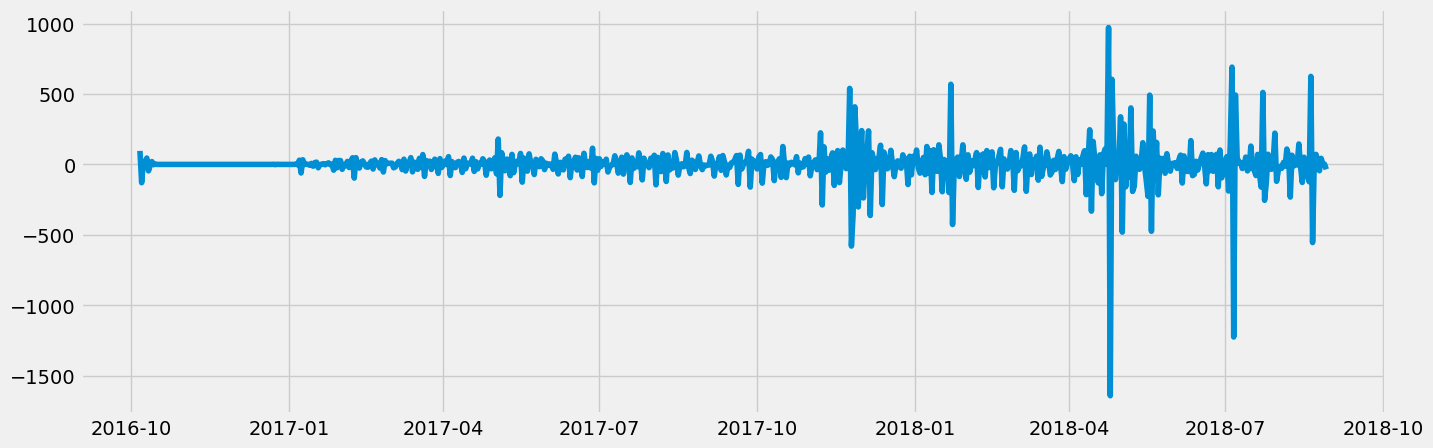

In [39]:
# Checking out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_data_diff2)

In [40]:
dickey_fuller(df_data_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                -1.118225e+01
p-value                        2.484239e-20
Number of Lags Used            2.000000e+01
Number of Observations Used    6.720000e+02
Critical Value (1%)           -3.440119e+00
Critical Value (5%)           -2.865851e+00
Critical Value (10%)          -2.569066e+00
dtype: float64


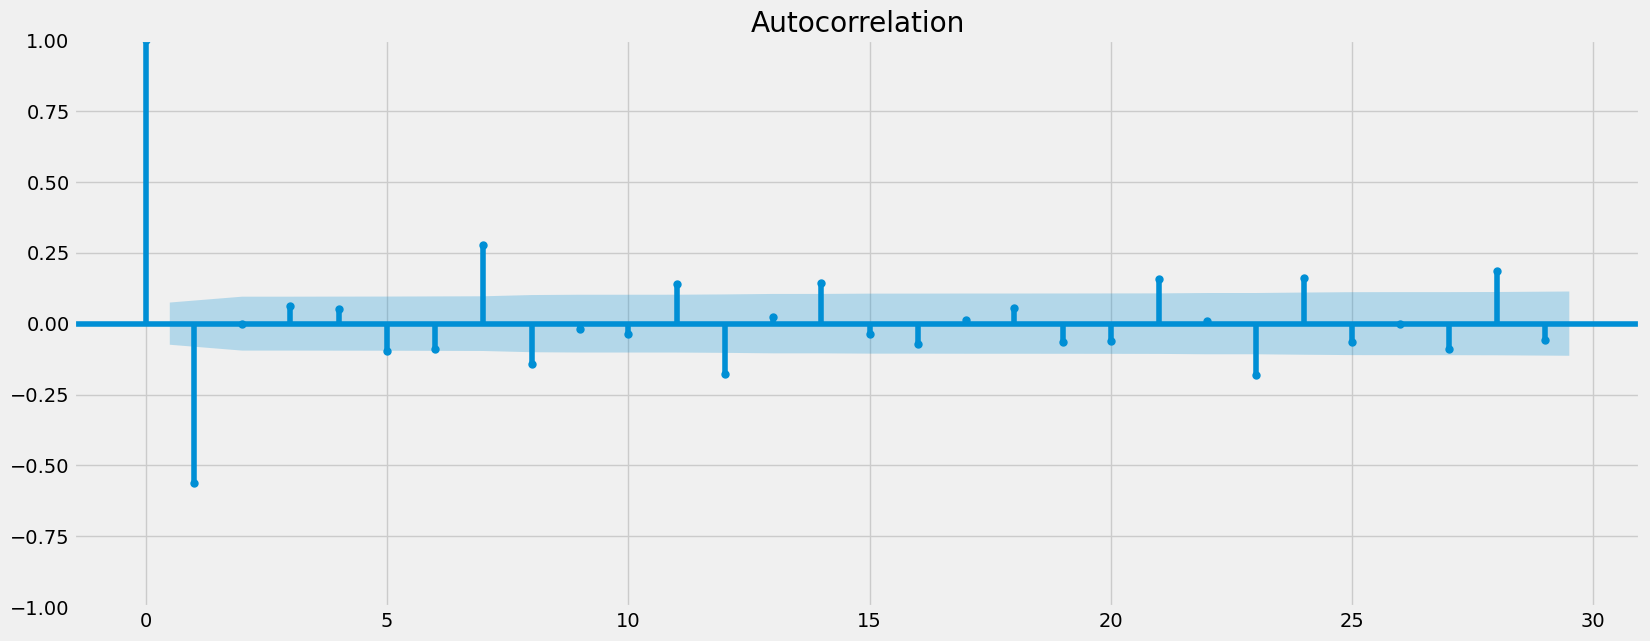

In [41]:
plot_acf(df_data_diff2)
plt.show()

In [42]:
# exporting df

